In [49]:
#coding:utf-8
'''
图片边缘检测
'''
%matplotlib inline
import cv2
import numpy as np

import matplotlib.pyplot as plt

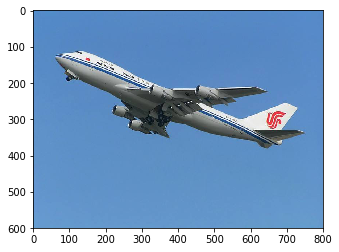

In [50]:
src = cv2.imread('datas/plane.jpg')
plt.imshow(cv2.cvtColor(src,cv2.COLOR_BGR2RGB))

In [51]:
'''
Roberts边缘算子
g(i, j) = sqrt( (f(i, j) - f(i + 1, j))^2 + (f(i + 1, j) - f(i, j +1))^2 )
或者
g(i, j) = |f(i,j) - f(i + 1,j)| + |f(i+1,j) - f(i,j+1)|
'''
def roberts(src):
    if type(src) == type(None) or len(src.shape) > 2:
        return None
    
    rows,cols = src.shape
    
    dst = np.zeros_like(src)
    
    for y in range(rows - 1):
        for x in range(cols - 1):
            pixel = np.abs(src[y,x] - src[y + 1,x]) + \
                    np.abs(src[y + 1,x] - src[y,x + 1])
            if pixel > 255:
                pixel = 255
            dst[y,x] = pixel
            
    return dst
    

C:\Users\jenson\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in ubyte_scalars


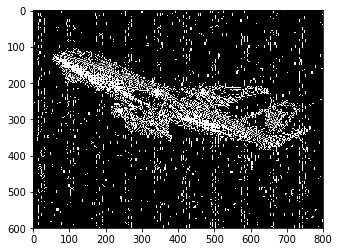

In [52]:
dst = roberts(cv2.cvtColor(src,cv2.COLOR_BGR2GRAY))
plt.imshow(dst,cmap = plt.cm.gray)

In [53]:
'''
Sobel算子
对数字图像的每一个像素f(i,j),考察它的上、下、左、右邻域灰度的加权值，把各方向上(0度、45度、90度、135度)的灰度值加权之和作为输出，可以达到提取图像边缘的效果。

即 g(i,j) = fxr + fyr, 其中

fxr = f(i-1,j-1)+2*f(i-1,j)+f(i-1,j+1)-f(i+1,j-1)-2*f(i+1,j)-f(i+1,j+1)

fyr = f(i-1,j-1)+2*f(i,j-1)+f(i+1,j-1)-f(i-1,j+1)-2*f(i,j+1)-f(i+1,j+1)
'''
def sobel(src):
    if type(src) == type(None) or len(src.shape) > 2:
        return None
    rows,cols = src.shape
    dst = np.zeros_like(src)
    
    for y in range(1,rows - 1):
        for x in range(1,cols - 1):
            fxr = src[y - 1,x - 1] + 2 * src[y - 1,x] + src[y - 1,x + 1] - \
                src[y + 1,x - 1] - 2 * src[y + 1,x] - src[y + 1,x + 1]
            
            fyr = src[y-1,x-1] + 2 * src[y,x - 1] + src[y + 1,x - 1] - \
                    src[y - 1,x + 1]-2 * src[y,x + 1] - src[y + 1,x + 1]
                
            pixel = fxr + fyr
            if pixel < 0:
                pixel = 0
            if pixel > 255:
                pixel = 255
            dst[y,x] = pixel
            
    return dst

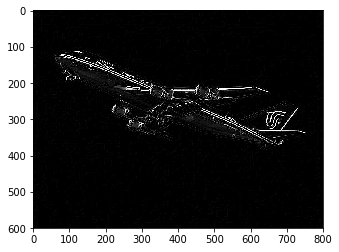

In [54]:
dst = sobel(cv2.cvtColor(src,cv2.COLOR_BGR2GRAY))
plt.imshow(dst,cmap = plt.cm.gray)

In [57]:
'''
Laplace算子
Laplace算子是一种二阶微分算子。它有两种形式:4邻域微分算子和8邻域微分算子。
 ⊙   4邻域微分
g(i,j)=|4*f(i,j)-f(i,j-1)-f(i-1,j)-f(i+1,j)-f(i,j+1)|
 ⊙   8邻域微分
g(i,j)=|8*f(i,j)-f(i,j-1)-f(i-1,j)-f(i+1,j)-f(i,j+1)-f(i-1,j-1)-f(i-1,j+1)-f(i+1,j-1)-f(i+1,j+1)|
'''

def laplace(src,ksize):
    if type(src) == type(None) or len(src.shape) > 2:
        return None
#     if ksize != 4 or ksize != 8:
#         return None
    rows,cols = src.shape
    dst = np.zeros_like(src)
    
    if ksize == 4:
        for i in range(rows - 1):
            for j in range(cols - 1):
                pixel =np.abs(4 * src[i,j] - src[i,j-1] - src[i-1,j] - \
                              src[i + 1,j]-src[i,j + 1])
                if pixel > 255:
                    pixel = 255
                dst[i,j] = pixel
    elif ksize == 8:
        for i in range(1,rows - 1):
            for j in range(1,cols - 1):
                pixel = np.abs(8 * src[i,j]-src[i,j-1]-src[i-1,j] - \
                              src[i+1,j]-src[i,j+1]-src[i-1,j-1]- \
                              src[i-1,j+1]-src[i+1,j-1]-src[i+1,j+1])
                if pixel > 255:
                    pixel = 255
                dst[i,j] = pixel
                
    return dst

<class 'numpy.ndarray'>


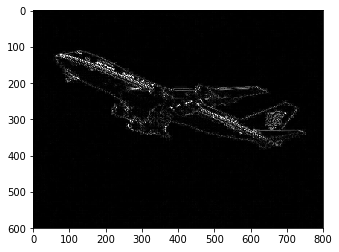

In [58]:
dst = laplace(cv2.cvtColor(src,cv2.COLOR_BGR2GRAY),4)
print(type(dst))
plt.imshow(dst,cmap = plt.cm.gray)

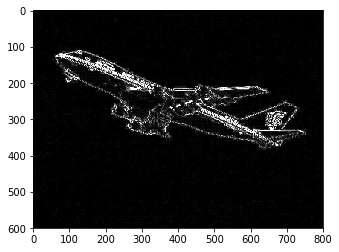

In [59]:
dst = laplace(cv2.cvtColor(src,cv2.COLOR_BGR2GRAY),8)
plt.imshow(dst,cmap = plt.cm.gray)